**Connect to Google Drive to import the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torchvision

# **Data Pre-processing and Augmentation**

In [0]:
#Constants for pre-processing
BATCH_SIZE = 3
classes = ['looking', 'not looking']

In [0]:
from torchvision import transforms

#Transformations for image data
data_transformations= {
    #Training data gest augmented 
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)), #Imagenet standards
        transforms.RandomRotation(degrees=30),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #Imagenet standards
    ]),
    #Validation data is only transformed to imagenet standards
    'valid':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    #Same with the test data
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [0]:
from torchvision import datasets
from torch.utils.data import DataLoader

#Data directories
train_dir= '/content/drive/My Drive/Colab Datasets/Looking Or Not Looking/train'
valid_dir= '/content/drive/My Drive/Colab Datasets/Looking Or Not Looking/valid'
test_dir= '/content/drive/My Drive/Colab Datasets/Looking Or Not Looking/test'

#Format data for pytorch's dataloader
data = {
    'train':
    datasets.ImageFolder(root=train_dir, transform=data_transformations['train']),
    'valid':
    datasets.ImageFolder(root=valid_dir, transform=data_transformations['valid']),
    'test':
    datasets.ImageFolder(root=test_dir, transform=data_transformations['test']),
}

#Dictionary of data loaders for train, validation, and test sets
data_loaders = {
    'train': DataLoader(data['train'], batch_size=BATCH_SIZE, shuffle=True),
    'valid': DataLoader(data['valid'], batch_size=BATCH_SIZE, shuffle=True),
    'test': DataLoader(data['test'], batch_size=BATCH_SIZE, shuffle=True)
}

# **Model**

In [20]:
from torchvision import models
model = models.resnet152(pretrained=True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
#Freeze the weights/gradients of the model
for param in model.parameters():
    param.requires_grad = False

In [8]:
import torch.nn as nn

#Replace the last fully-connected layer
model.fc = nn.Sequential(
                      nn.Linear(2048, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, 2),
                      nn.Softmax(dim=1))

model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
#Put the model on gpu and parallel
model = model.to('cuda')
model = nn.DataParallel(model)

# **Training**

In [0]:
from torch import optim
import numpy as np

#Hyperparameters for training
EPOCHS = 200

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=.0002)

In [11]:
for epoch in range(EPOCHS):
    #Running losses
    valid_loss = 0.0
    train_loss = 0.0
    
    #Running correct predictions
    train_correct = 0
    valid_correct = 0
    
    #Training
    for i, data in enumerate(data_loaders['train']):
        
        #Unload each batch and transfer it to GPU
        X_train, y_train = data
        X_train=X_train.cuda()
        y_train=y_train.cuda()
        
        #Hypothesis -> loss
        hypothesis = model(X_train)
        loss = criterion(hypothesis, y_train)
        train_loss += loss.item()
        
        #Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Get accuracy stats
        _, pred = torch.max(hypothesis, 1)
        correct = np.squeeze(pred.eq(y_train.data.view_as(pred)).cpu().numpy())
        train_correct += correct.sum()
        
        acc = correct.sum()/len(y_train)
        
        #Display per-batch statistics
        #print('Batch: ', i+1, ' | Training Loss: ', train_loss, ' | Accuracy: ', acc)

    #Validation 
    for i, data in enumerate(data_loaders['valid']):
        #Unload each batch and transfer it to GPU
        X_valid, y_valid = data
        X_valid=X_valid.cuda()
        y_valid=y_valid.cuda()
        
        #Hypothesis -> Loss -> Total Loss
        hypothesis = model(X_valid)
        loss = criterion(hypothesis, y_valid)
        valid_loss += loss.item()
        
        #Get accuracy stats
        _, pred = torch.max(hypothesis, 1)
        correct = np.squeeze(pred.eq(y_valid.data.view_as(pred)).cpu().numpy())
        valid_correct += correct.sum()

    print('Epoch ', epoch+1, ' | Training Loss: ', train_loss, ' | Validation Loss: ', valid_loss)
    print('Training Accuracy: ', train_correct/(len(data_loaders['train'])*BATCH_SIZE),
          ' | Validation Accuracy: ', valid_correct/(len(data_loaders['valid'])*BATCH_SIZE))

Epoch  1  | Training Loss:  14.397635757923126  | Validation Loss:  6.805215984582901
Training Accuracy:  0.5396825396825397  | Validation Accuracy:  0.5333333333333333
Epoch  2  | Training Loss:  13.1167251765728  | Validation Loss:  6.289968013763428
Training Accuracy:  0.6984126984126984  | Validation Accuracy:  0.6333333333333333
Epoch  3  | Training Loss:  11.387085109949112  | Validation Loss:  5.872100353240967
Training Accuracy:  0.8571428571428571  | Validation Accuracy:  0.7333333333333333
Epoch  4  | Training Loss:  10.819228857755661  | Validation Loss:  5.722579807043076
Training Accuracy:  0.8412698412698413  | Validation Accuracy:  0.7666666666666667
Epoch  5  | Training Loss:  10.294934242963791  | Validation Loss:  5.686311066150665
Training Accuracy:  0.8571428571428571  | Validation Accuracy:  0.7333333333333333
Epoch  6  | Training Loss:  9.580489963293076  | Validation Loss:  5.5679430067539215
Training Accuracy:  0.8888888888888888  | Validation Accuracy:  0.73333

# **Test**

In [13]:
test_acc = 0

for data in data_loaders['test']:
    #Unload each batch and transfer it to GPU
    X_test, y_test = data
    X_test=X_test.cuda()
    y_test=y_test.cuda()
    
    hypothesis = model(X_test)
    _, pred = torch.max(hypothesis, 1)
    correct = np.squeeze(pred.eq(y_test.data.view_as(pred)).cpu().numpy())
    test_acc += correct.sum()
    
print(test_acc/(len(data_loaders['test'])*BATCH_SIZE))

0.7777777777777778


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0, 1, 0])
tensor([1, 1, 0], device='cuda:0')


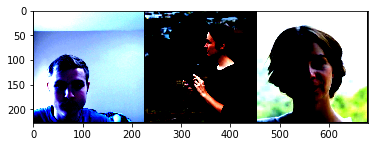

In [14]:
import matplotlib.pyplot as plt

#Get a batch from the training set
batch = next(iter(data_loaders['test']))
images,labels= batch

hypothesis = model(images)
_, pred = torch.max(hypothesis, 1)

#Dispaly predictions
grid = torchvision.utils.make_grid(images, nrow=3)
plt.figure(figsize=(6,3))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print(labels)
print(pred)

In [0]:
#Save the model for use
torch.save(model, '/content/drive/My Drive/Colab Notebooks/resnet_model.pt')